In [19]:

import numpy as np
import pandas as pd
import time
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from dython.nominal import associations
from sklearn.preprocessing import MinMaxScaler


In [20]:
data = pd.read_csv(r'C:\3rd_year\second term\pattern recognition\Project\player-classification.csv')

# View Data
print(data.describe())
print(data.info())
print(data.head())
print("The number of rows in the dataset are:", data.shape[0])
print("The number of columns in the dataset are:", data.shape[1])

                  id           age     height_cm    weight_kgs  \
count   14363.000000  14363.000000  14363.000000  14363.000000   
mean   215308.410569     25.575367    174.902069     75.304268   
std     29906.749470      4.700271     14.056556      7.085472   
min        16.000000     17.000000    152.400000     49.900000   
25%    200913.000000     22.000000    154.940000     69.900000   
50%    222771.000000     25.000000    175.260000     74.800000   
75%    237607.000000     29.000000    185.420000     79.800000   
max    247607.000000     45.000000    205.740000    110.200000   

       overall_rating     potential           wage  \
count    14363.000000  14363.000000   14172.000000   
mean        66.257676     71.435355    9888.371437   
std          6.958515      6.120675   21943.412002   
min         47.000000     48.000000    1000.000000   
25%         62.000000     67.000000    1000.000000   
50%         66.000000     71.000000    3000.000000   
75%         71.000000     7

In [21]:
# X_train, X_test, Y_train, Y_test = train_test_split(
#     data, data['PlayerLevel'], test_size=0.2, random_state=20)

In [23]:


##################################################################
# encoding for string values
data = data.drop(['id', 'full_name', 'birth_date',
            'nationality', 'body_type'], axis=1)
###################################################################
# Split Positions In Splited Columns
new_player_position = data['positions'].str.get_dummies(sep=',').add_prefix('position')
#print(new_player_position.head())
data =  pd.concat([data,new_player_position],axis = 1)

print(data.head())
#print(data.info())

column = ['LS', 'ST', 'RS',
      'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
      'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
      'RCB', 'RB']
###################################################################
# Split Values In Columns (+2)
for col in column:
  data[col]=data[col].str.split('+',n=1,expand=True)[0]

#print(data[column].head())
###################################################################
# Fill Null Values By 0
data[column] = data[column].fillna(0)
data[column] = data[column].astype(int)
#print(data[column].info())


KeyError: "['id' 'full_name' 'birth_date' 'nationality' 'body_type'] not found in axis"

In [9]:

###################################################################
# Fill Null Values By Mean
data['shot_power'] = data['shot_power'].fillna(data['shot_power'].median())
data['dribbling'] = data['dribbling'].fillna(data['dribbling'].median())

data['wage'] = data['wage'].fillna(data['wage'].mean())
###################################################################
# Drop Columns That Have Null Values >= 25%
for col in data.columns:
  val = data[col].isnull().sum()/data[col].count()*100
if(val >= 25):
  print(col + "="+str(val))
  data = data.drop(col, axis=1)


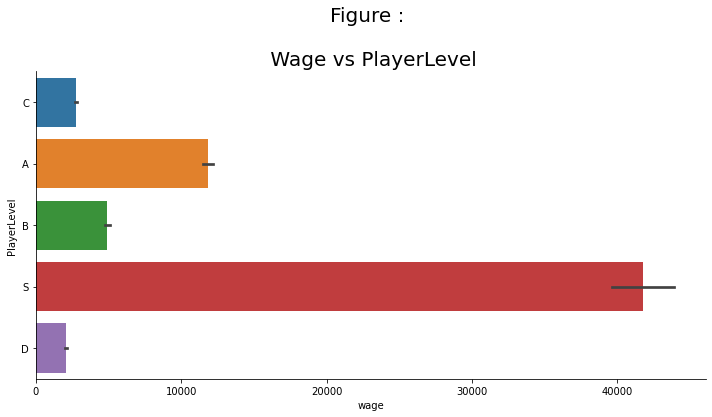

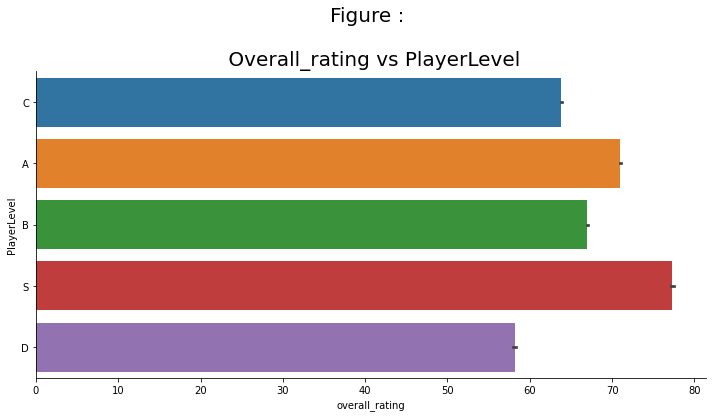

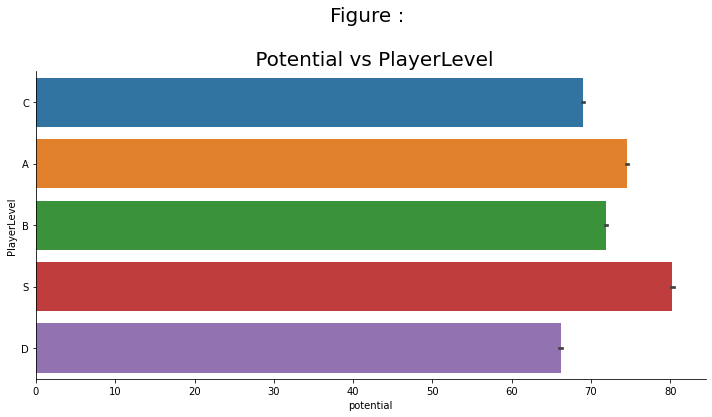

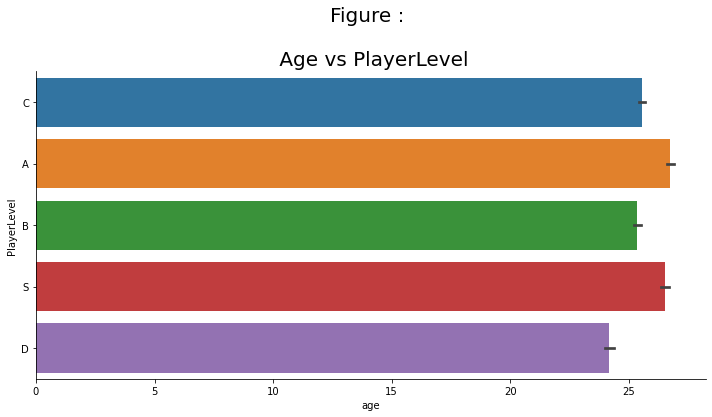

In [366]:

# Draw The Relation Between The Preferred_Foot And (overall_rating,wage,PlayerLevel)
sns.catplot(x="wage", y="PlayerLevel",
            data=data, aspect=2, kind="bar")
plt.title("Figure : \n\n Wage vs PlayerLevel",
            fontsize=20)

plt.show()
sns.catplot(x="overall_rating", y="PlayerLevel",
            data=data, aspect=2, kind="bar")
plt.title("Figure : \n\n Overall_rating vs PlayerLevel",
            fontsize=20)

plt.show()

sns.catplot(x="potential", y="PlayerLevel",
            data=data, aspect=2, kind="bar")
plt.title("Figure : \n\n Potential vs PlayerLevel",
            fontsize=20)

plt.show()
sns.catplot(x="age", y="PlayerLevel",
            data=data, aspect=2, kind="bar")
plt.title("Figure : \n\n Age vs PlayerLevel",
            fontsize=20)
plt.show()

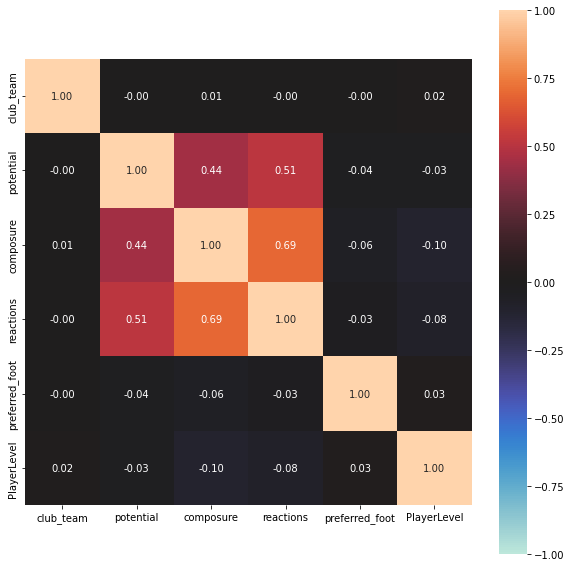

In [367]:

# df = X_train[['club_team', 'potential',  'composure', 'reactions',
#                 'preferred_foot',  'PlayerLevel']]
# complete_correlation = associations(
#     df, filename='complete_correlation.png', figsize=(10, 10))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data, data['PlayerLevel'], test_size=0.2, random_state=20)

In [18]:
data['age'].isnull().sum()

0

In [370]:

cols = ['club_team',
        'preferred_foot', 'club_position', 'PlayerLevel']
for c in cols:
    a = preprocessing.LabelEncoder()
    X_train[c] = a.fit_transform(X_train[c].values)
    X_test[c] = a.transform(X_test[c].values)


In [371]:
print(len(X_train))
print(len(X_test))

11490
2873


In [372]:

mx = MinMaxScaler()
col = []
for c in data.columns:
    if data[c].dtype == 'object':
        continue
    else:
        col.append(c)


In [373]:
X_train.fillna(0)
X_test.fillna(0)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,wage,preferred_foot,international_reputation(1-5),...,positionGK,positionLB,positionLM,positionLW,positionLWB,positionRB,positionRM,positionRW,positionRWB,positionST
10968,Fábio Cardoso,24,187.96,81.2,CB,70,77,3000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
13756,B. Assombalonga,26,152.40,78.0,ST,72,75,38000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
11478,L. Mai,18,190.50,88.0,CB,64,84,5000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5809,Cifu,28,175.26,66.2,"RB,RWB",69,69,5000.0,1,1,...,0,0,0,0,0,1,0,0,1,0
2560,G. Lapslie,21,172.72,66.2,CM,58,71,1000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13965,R. Towell,27,172.72,66.2,CM,69,70,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
10654,E. Durrell,29,152.40,74.8,"RW,RM,CAM",60,60,2000.0,1,1,...,0,0,0,0,0,0,1,1,0,0
5805,J. Stanic,19,187.96,79.8,CB,59,73,1000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
6867,J. O'Shea,30,182.88,69.9,"CM,CAM",63,63,4000.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [374]:

X_train_scaled=mx.fit_transform(X_train[col])
X_test_scaled=mx.transform(X_test[col])


In [380]:
X_trainPD=pd.DataFrame(X_train_scaled,columns=X_train[col].columns)
X_trainPD=X_trainPD.fillna(0)
X_testPD=pd.DataFrame(X_test_scaled,columns=X_test[col].columns)
X_testPD=X_testPD.fillna(0)

In [376]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [377]:
X_train_scaled

array([[0.58333333, 0.7       , 0.57968476, ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.45      , 0.37302977, ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.35      , 0.43607706, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.05      , 0.2854641 , ..., 0.        , 0.        ,
        1.        ],
       [0.45833333, 0.4       , 0.40455342, ..., 0.        , 0.        ,
        0.        ],
       [0.54166667, 0.65      , 0.47635727, ..., 0.        , 0.        ,
        0.        ]])

In [378]:
le=LabelEncoder()
y_t=le.fit_transform(Y_train)

In [381]:
model=LogisticRegression()
model.fit(X_trainPD,Y_train)
model.score(X_testPD,Y_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7584406543682561

In [382]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_trainPD, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.890688,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.881549,{'n_estimators': 10}
2,logistic_regression,0.757615,{'C': 10}
